* * * * * * USING MFCC * * * * * *
logistic accuracy = 0.7540983606557377
logistic_cm:
[[5 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 1 0]
 [0 0 4 0 1 0 0 1 0]
 [0 0 0 5 0 0 0 0 1]
 [1 0 0 0 8 0 2 0 0]
 [0 0 0 0 0 9 0 0 0]
 [0 0 0 0 1 0 6 0 0]
 [1 0 0 0 0 0 1 3 0]
 [0 0 1 1 0 0 3 0 3]]
knn accuracy = 0.9836065573770492
knn_cm:
[[ 5  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  1  0  0  0  7]]
svm accuracy = 0.8032786885245902
svm_cm:
[[4 0 0 0 0 0 0 1 0]
 [0 3 0 0 0 0 0 1 0]
 [0 0 6 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 2 0]
 [0 0 0 0 8 0 0 3 0]
 [0 0 0 0 0 8 0 1 0]
 [0 0 0 0 0 0 4 3 0]
 [0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 1 7]]


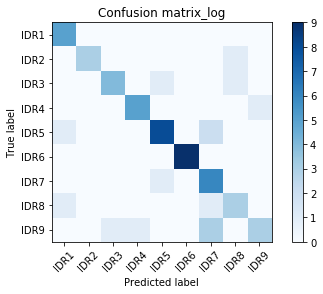

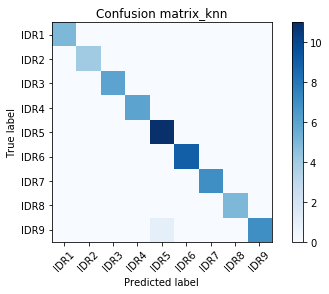

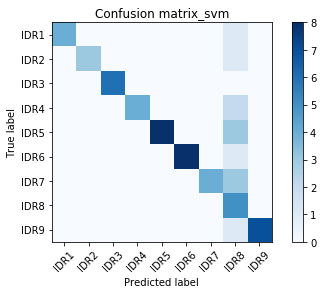

* * * * * * * * * * * * * * * * * * * * *


In [10]:
import sklearn 
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import scipy
import os
import sys
import glob
import numpy as np
from utils1 import DIALECT_DIR, DIALECT_LIST
from sklearn.externals import joblib
from random import shuffle

def read_ceps(dialect_list, base_dir):

	X = []
	y = []
	for label, dialect in enumerate(dialect_list):
		for fn in glob.glob(os.path.join(base_dir, dialect, "*.ceps.npy")):
			ceps = np.load(fn)
			num_ceps = len(ceps)
			X.append(np.mean(ceps[int(num_ceps*0/10):int(num_ceps*10/10)], axis=0))
			y.append(label)
	return np.array(X), np.array(y)

def learn_and_classify(X_train, y_train, X_test, y_test, dialect_list):

	# Logistic Regression classifier

	logistic_classifier = linear_model.logistic.LogisticRegression()
	logistic_classifier.fit(X_train, y_train)
	logistic_predictions = logistic_classifier.predict(X_test)
	logistic_accuracy = accuracy_score(y_test, logistic_predictions)
	logistic_cm = confusion_matrix(y_test, logistic_predictions)
	print("logistic accuracy = " + str(logistic_accuracy))
	print("logistic_cm:")
	print(logistic_cm)

	# K-Nearest neighbour classifier

	knn_classifier = KNeighborsClassifier()
	knn_classifier.fit(X_train, y_train)
	knn_predictions = knn_classifier.predict(X_test)
	knn_accuracy = accuracy_score(y_test, knn_predictions)
	knn_cm = confusion_matrix(y_test, knn_predictions)
	print("knn accuracy = " + str(knn_accuracy))
	print("knn_cm:") 
	print(knn_cm)

	# SVM

	svm_classifier = svm.SVC()
	svm_classifier.fit(X_train, y_train)
	svm_predictions = svm_classifier.predict(X_test)
	svm_accuracy = accuracy_score(y_test, svm_predictions)
	svm_cm = confusion_matrix(y_test, svm_predictions)
	print("svm accuracy = " + str(svm_accuracy))
	print("svm_cm:") 
	print(svm_cm)
	
	plot_confusion_matrix(logistic_cm, "Confusion matrix_log", dialect_list)
	plot_confusion_matrix(knn_cm, "Confusion matrix_knn", dialect_list)
	plot_confusion_matrix(svm_cm, "Confusion matrix_svm", dialect_list)

def plot_confusion_matrix(cm, title, dialect_list, cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(dialect_list))
    plt.xticks(tick_marks, dialect_list, rotation=45)
    plt.yticks(tick_marks, dialect_list)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


def main():
	
	base_dir_mfcc = DIALECT_DIR
	dialect_list = [ "IDR1","IDR2","IDR3","IDR4","IDR5","IDR6","IDR7","IDR8","IDR9"]
	X, y = read_ceps(dialect_list, base_dir_mfcc)
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10)
	print('* * * * * * USING MFCC * * * * * *')
	learn_and_classify(X_train, y_train, X_test, y_test, dialect_list)
	print('* * * * * * * * * * * * * * * * * * * * *')
	

if __name__ == "__main__":

	main()